<a href="https://colab.research.google.com/github/Suchitech02/AutofacUse/blob/master/Text_classification_final_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 2: Text Classification

Note: For this lab exercise, it is recommended that you use [Google colab](https://colab.research.google.com/) to avoid issues concerning the deep learning module dependencies on your local system.

For questions contact:

Yash Pawar

email ID: yash.pawar@dsv.su.se

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Introduction


In this lab exercise, we will perform classification of text into predefined classes using Machine Learning. In particular, we will be classifying the text from [BBC](http://mlg.ucd.ie/datasets/bbc.html) dataset consisting of 5 different classes. 

In [ ]:
import pandas as pd
import os
import numpy as np

## Suppress warnings

import warnings
warnings.filterwarnings("ignore")

### 2. Import Dataset


In [ ]:
# Note: The filepath has been specified considerning that the notebook is run using google colab.

bbc = pd.read_csv(filepath_or_buffer='drive/MyDrive/content/bbc_text.csv', delimiter = ',')
bbc.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
from sklearn.model_selection import train_test_split

## To do: Replace the ??? with code to split the dataset into train and test set
training_bbc, test_bbc = train_test_split(bbc, test_size=0.33, random_state=42)
training_bbc, test_bbc

(      category                                               text
 1538  politics  no election tv debate  says blair tony blair h...
 187      sport  veteran martinez wins thai title conchita mart...
 619       tech  virgin radio offers 3g broadcast uk broadcaste...
 2000  business  oil companies get russian setback internationa...
 158   politics  uk firms  embracing e-commerce  uk firms are e...
 ...        ...                                                ...
 1638     sport  a november to remember last saturday  one news...
 1095     sport  african double in edinburgh world 5000m champi...
 1130      tech  what price for  trusted pc security   you can ...
 1294     sport  o driscoll/gregan lead aid stars ireland s bri...
 860       tech  new year s texting breaks record a mobile phon...
 
 [1490 rows x 2 columns],
            category                                               text
 414        politics  brown and blair face new rift claims for the u...
 420        business  sm

### 3. Visualization

Your task here is to get an understanding of distribution of different classes in the data by visualization and compare them.

You are expected to generate two plots, on for each training and test dataset.

You can refer to the [Bar plots tutorial](https://pythonguides.com/matplotlib-plot-bar-chart/) to know more.

Counter({'sport': 353, 'business': 329, 'politics': 292, 'tech': 259, 'entertainment': 257})


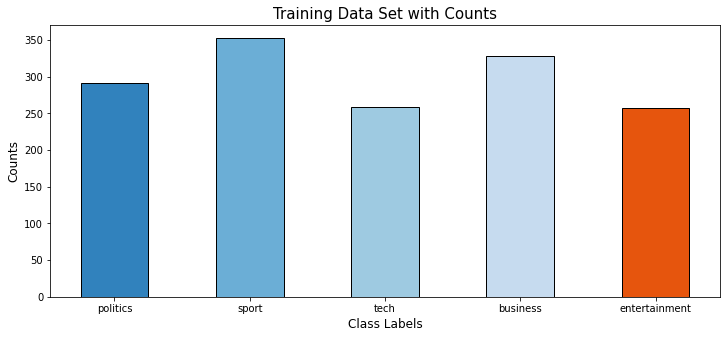

Counter({'business': 181, 'sport': 158, 'tech': 142, 'entertainment': 129, 'politics': 125})


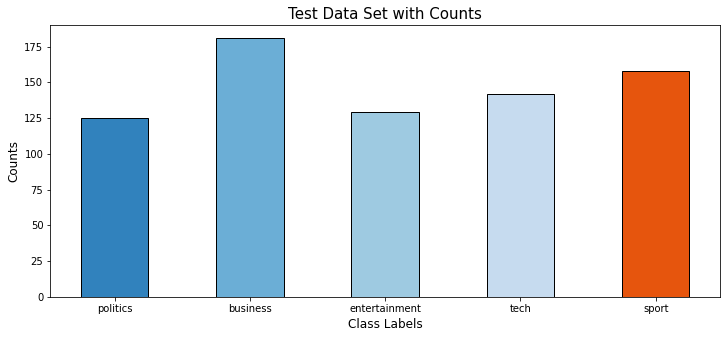

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from numpy.ma.core import shape

# To do: add the code below to plot the Distribution of classes in both the datasets.
# For training_datasets
class_labels = training_bbc['category'].values.tolist()
class_counter = Counter(class_labels)
print(class_counter)
plt.figure(figsize=[12,5])
column_map = plt.get_cmap('tab20c')

# Bar Chart
plt.bar(class_counter.keys(), class_counter.values(), width=0.5, color=column_map.colors, edgecolor='Black', linewidth=1)

plt.title('Training Data Set with Counts', fontsize=15)
plt.xlabel('Class Labels', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

# For test_datasets
class_labels_test = test_bbc['category'].values.tolist()
class_counter_test = Counter(class_labels_test)
print(class_counter_test)
plt.figure(figsize=[12,5])
column_map_test = plt.get_cmap('tab20c')

# Bar Chart
plt.bar(class_counter_test.keys(), class_counter_test.values(), width=0.5, color=column_map_test.colors, edgecolor='Black', linewidth=1)

plt.title('Test Data Set with Counts', fontsize=15)
plt.xlabel('Class Labels', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

### 5. Classification using Naive Bayes

For training and validation, we will use a [Multinomial Naive Bayes classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html). Here, you are expected to:

1. Vectorize the text from the training set.
2. Train the classifier
3. Evaluate the classifier using the test set. 

Tip: You can use [sklearn's pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) functionality to perform steps 1 and 2. 

Tip: You can use [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to print the results of evaluation.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Train and evaluate a Multinomial Naive Bayes classifier
# To do: Add the code below to build a pipeline for the classifier.
vectorizer = CountVectorizer(stop_words='english')
mnb = MultinomialNB()

# Adding pipeline to avoid any leaks from test sets to train tests.
pipe = Pipeline([('vectorizer', vectorizer), ('mnb', mnb)])
pipe.fit(training_bbc['text'], training_bbc['category'])

y_predict = pipe.predict(test_bbc['text'])
print(classification_report(test_bbc['category'],y_predict))



               precision    recall  f1-score   support

     business       0.99      0.96      0.97       181
entertainment       1.00      0.93      0.96       129
     politics       0.93      0.99      0.96       125
        sport       0.99      1.00      1.00       158
         tech       0.95      0.99      0.97       142

     accuracy                           0.97       735
    macro avg       0.97      0.97      0.97       735
 weighted avg       0.98      0.97      0.97       735



### 6. Baseline Classifier

You can compare the performance of your Machine Learning model with a simple baseline classifier. One possibility could be to use a classifier that generates predictions by respecting the training set’s class distribution. You can consider using [Dummy classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) from scikit learn.



In [ ]:
from sklearn.dummy import DummyClassifier

# Evaluate the random baseline
baseline = DummyClassifier(strategy="stratified")
baseline.fit(training_bbc['text'], training_bbc['category'])
baseline.predict(test_bbc['text'])
baseline.score(test_bbc['text'], test_bbc['category'])

y_predict = baseline.predict(test_bbc['text'])
print(classification_report(test_bbc['category'], y_predict))

# To do: Add the code below to train the baseline classifier and evaluate it.


               precision    recall  f1-score   support

     business       0.21      0.20      0.21       181
entertainment       0.16      0.16      0.16       129
     politics       0.16      0.18      0.17       125
        sport       0.24      0.25      0.24       158
         tech       0.20      0.17      0.18       142

     accuracy                           0.20       735
    macro avg       0.19      0.19      0.19       735
 weighted avg       0.20      0.20      0.20       735



Is the result from the baseline classifier justified?

### 6. Grid Search

So far, you have trained the vectorizer and the classifer using their default parameters. However, in practical settings, one needs to optimize the parameters of the model to maximize the performance. 

Here, you are asked to find the optimal parameters for the pipelines that you have created above using a 5 fold cross validation. The choice of hyperparameters for optimization are:

1. Bi-grams vs uni-grams vs tri-grams from [Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). 
2. Additive smoothing  for the Multinomial naive bayes classifier $\alpha$ = {1, 0.1}
3. Tokenized vs non-tokenized text (For tokenization, you can use the function 'preprocess' that is given below as a parameter for the vectorizer.)


You can refer to the [Grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) documentation from the scikit-learn library.

Finally, print the parameters from the grid search that give the best performance. 

In [ ]:

# Function preprocess can be used as a tokenizer.

import spacy
nlp = spacy.load('en_core_web_sm', disable=["tagger", "parser", "ner"])

def preprocess(text):
    doc = nlp(text)
 
    final_key=[]
    for token in doc:
        if token.is_stop==False and token.lemma_.isalpha():
            
            final_key.append(token.lemma_)
        
    return final_key

In [ ]:
from sklearn.model_selection import GridSearchCV

# To do: Replace the ??? in the code and implement the grid search
# Note: Take a look at how you an specify the parameters for grid search from an example of n-grams. Similarly, you can specify the other remaining parameters.
params = {'vectorizer__ngram_range':[(1,1), (1,2), (1,3)],
          'vectorizer__tokenizer':[None, preprocess],
          'mnb__alpha' :[1, 0.1]}

grid_classifier = GridSearchCV(pipe, params)
grid_classifier.fit(training_bbc['text'], training_bbc['category'])
grid_classifier.best_params_




{'mnb__alpha': 0.1,
 'vectorizer__ngram_range': (1, 3),
 'vectorizer__tokenizer': <function __main__.preprocess>}

## 7. Fine-tuning using BERT

In this section, you will see how a pre-trained BERT model can be fine tuned for the task of text classification. 

Run the following cells to fine-tune the model. 

In [ ]:
'Download the tokenizer and BERT module for python'

#!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py



!pip install bert-for-tf2
!pip install sentencepiece

     |████████████████████████████████| 41 kB 150 kB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30535 sha256=56da81e661521755b08ce03dd4933aee21946af776e4266222075eb284933d15
  Stored in directory: /root/.cache/pip/wheels/47/b6/e5/8c76ec779f54bc5c2f1b57d2200bb9c77616da83873e8acb53
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19472 sha256=1f635d85d2767ff10c2d5cbc27fd6e3a620ef443683ec4e87246e3877a6c6f0c
  Stored in directory: /root/.cache/pip/wheels/0e/fc/d2/a44fff33af0f233d7def6e7de413006d57c10e10ad736fe8f5
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7911 sha256=45844020fb01587d2aa581ff08518f56ceacbb3f0583169bf7d7ee7ddc9f2471
  Stored in directory: /root/.cache/pip/wheels/e1/11/67/33cc51bbee127cb8fb2ba549cd29109b2f22da43ddf9969716
Successfully built bert-for-tf2 params-flow py-params
     |████████████████████████████████| 1.2 MB 11.7 MB/s 


In [ ]:
'Import all the necessary modules'

#import tokenization
import tensorflow as tf
import tensorflow_hub as hub
import bert
from tensorflow.keras.models import  Model
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

print("TensorFlow Version:",tf.__version__)
print("Hub version: ",hub.__version__)

TensorFlow Version: 2.8.0
Hub version:  0.12.0


In [ ]:
'Download the pretrained BERT model'

m_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2'
bert_layer = hub.KerasLayer(m_url, trainable=True)

In [ ]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
#tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

'Use BERT tokenizer'
FullTokenizer = bert.bert_tokenization.FullTokenizer
tokenizer=FullTokenizer(vocab_file,do_lower_case)


def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
        
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len-len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence) + [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
        
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [ ]:
def build_model(bert_layer, max_len=512):
    input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")
    
    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    
    clf_output = sequence_output[:, 0, :]
    
    lay = tf.keras.layers.Dense(64, activation='relu')(clf_output)
    lay = tf.keras.layers.Dropout(0.2)(lay)
    lay = tf.keras.layers.Dense(32, activation='relu')(lay)
    lay = tf.keras.layers.Dropout(0.2)(lay)
    out = tf.keras.layers.Dense(5, activation='softmax')(lay)
    
    model = tf.keras.models.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(tf.keras.optimizers.Adam(lr=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
'Set the maximum length of the sequence'
max_len = 512

'Transform non-numerical labels to numerical'
label = preprocessing.LabelEncoder()
train_labels = label.fit_transform(training_bbc['category'])
train_labels = to_categorical(train_labels)

'Prepare the input by tokenising and padding the text sequence'
train_input = bert_encode(training_bbc.text.values, tokenizer, max_len=max_len)
test_input = bert_encode(test_bbc.text.values, tokenizer, max_len=max_len)



In [ ]:
labels = label.classes_
print(labels)

['business' 'entertainment' 'politics' 'sport' 'tech']


In [ ]:
'Build the model'

model = build_model(bert_layer, max_len=max_len)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 512)]        0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 512)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 512, 768)]                'input_mask[0][0]',         

In [ ]:
'Start training the model'

checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

train_sh = model.fit(
    train_input, train_labels,
    validation_split=0.1,
    epochs=5,
    callbacks=[checkpoint, earlystopping],
    batch_size=4,
    verbose=1
)

Epoch 1/5
336/336 [==============================] - ETA: 0s - loss: 0.0791 - accuracy: 0.9791
Epoch 1: val_accuracy improved from -inf to 0.96644, saving model to model.h5
336/336 [==============================] - 373s 1s/step - loss: 0.0791 - accuracy: 0.9791 - val_loss: 0.1637 - val_accuracy: 0.9664
Epoch 2/5
336/336 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9933
Epoch 2: val_accuracy improved from 0.96644 to 0.97315, saving model to model.h5
336/336 [==============================] - 373s 1s/step - loss: 0.0354 - accuracy: 0.9933 - val_loss: 0.1461 - val_accuracy: 0.9732
Epoch 3/5
336/336 [==============================] - ETA: 0s - loss: 0.0485 - accuracy: 0.9866
Epoch 3: val_accuracy did not improve from 0.97315
336/336 [==============================] - 368s 1s/step - loss: 0.0485 - accuracy: 0.9866 - val_loss: 0.1607 - val_accuracy: 0.9530
Epoch 4/5
336/336 [==============================] - ETA: 0s - loss: 0.0665 - accuracy: 0.9814
Epoch 4: val_a

In [ ]:
'Predict the classes from the fine-tuned BERT model'
bert_pred = model.predict(test_input)

In [ ]:
'Invert the classes from numerical to non-numerical (original) categories'
y_pred_bert = label.inverse_transform(np.argmax(bert_pred.round().astype(int), axis=1))

In [ ]:

print(classification_report(test_bbc['category'], y_pred_bert, digits=4))

               precision    recall  f1-score   support

     business     0.9773    0.9503    0.9636       181
entertainment     0.9846    0.9922    0.9884       129
     politics     0.9389    0.9840    0.9609       125
        sport     1.0000    0.9747    0.9872       158
         tech     0.9792    0.9930    0.9860       142

     accuracy                         0.9769       735
    macro avg     0.9760    0.9788    0.9772       735
 weighted avg     0.9773    0.9769    0.9769       735



1. Comment on the results. Is there any improvement in performance when compared to MultinomialNB?

2. Try changing the number of epochs to 3 and then 5 to see if there is any improvement in the performance. 

In [ ]:
grid_best_predict = grid_classifier.predict(test_bbc['text'])
print(classification_report(test_bbc['category'], grid_best_predict, digits=4))

               precision    recall  f1-score   support

     business     0.9830    0.9558    0.9692       181
entertainment     1.0000    0.9380    0.9680       129
     politics     0.9185    0.9920    0.9538       125
        sport     0.9937    0.9937    0.9937       158
         tech     0.9724    0.9930    0.9826       142

     accuracy                         0.9741       735
    macro avg     0.9735    0.9745    0.9735       735
 weighted avg     0.9753    0.9741    0.9742       735

